<a href="https://colab.research.google.com/github/natalfr17/An-lise-Estat-stica-de-Dados-e-Informa-es/blob/main/Prova_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 2**


Esta questão aborda a aplicação prática de um problema de Ciência de Dados utilizando
Machine Learning. O objetivo é prever se os indivíduos irão cancelar suas reservas
em uma rede de hotéis, utilizando o conjunto de dados Hotel Booking Demand. Siga
os passos abaixo para desenvolver sua solução:

# **a) Análise Descritiva dos Dados (10%)**

• Realize uma análise descritiva da base de dados.

• Inclua gráficos e tabelas para explorar as características dos dados.

In [1]:
# Importar bibliotecas

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/hotel-booking-demand


In [3]:
# Ler base

df = pd.read_csv(path + '/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# Checar valores nulos

df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


/tmp/ipython-input-7-2644926257.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_canceled', y='count', data=df_canceled_counts, palette='pastel')


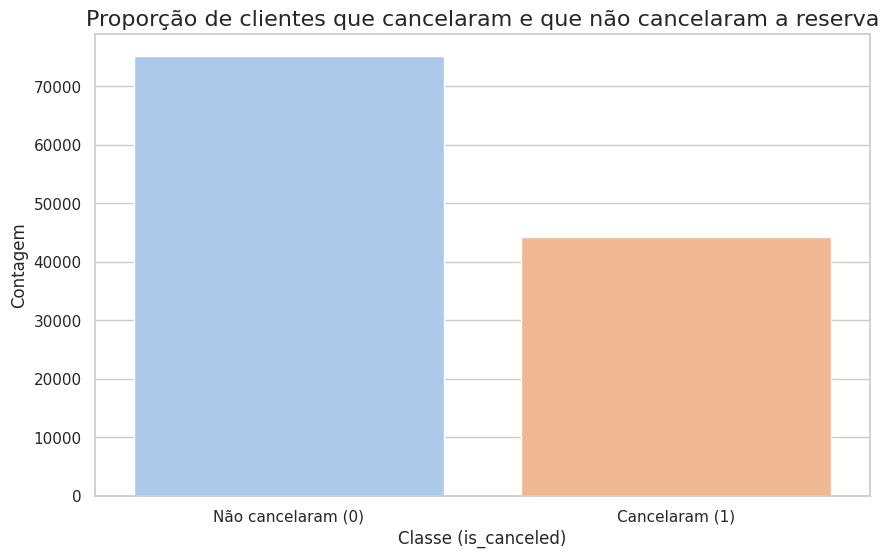

is_canceled
0    75166
1    44224
Name: count, dtype: int64
Percentual de pessoas que não cancelaram a reserva 62.96 %
Percentual de pessoas que cancelaram a reserva 37.04 %


In [7]:
# Entender a proporção da base

# Correcting the line that caused the error
df_canceled_counts = df['is_canceled'].value_counts().reset_index()
df_canceled_counts.columns = ['is_canceled', 'count']

plt.figure(figsize=(10,6))
sns.barplot(x='is_canceled', y='count', data=df_canceled_counts, palette='pastel')
plt.title("Proporção de clientes que cancelaram e que não cancelaram a reserva", fontsize=16)
plt.xlabel('Classe (is_canceled)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0,1], ['Não cancelaram (0)', 'Cancelaram (1)'])
plt.show()
print(df['is_canceled'].value_counts())
count_no_can = (df['is_canceled']==0).sum()
count_can = (df['is_canceled']==1).sum()
pct_of_no_can = count_no_can/(count_no_can+count_can)
print("Percentual de pessoas que não cancelaram a reserva", round(pct_of_no_can*100, 2), '%')
pct_of_can = count_can/(count_no_can+count_can)
print("Percentual de pessoas que cancelaram a reserva", round(pct_of_can*100, 2), '%')

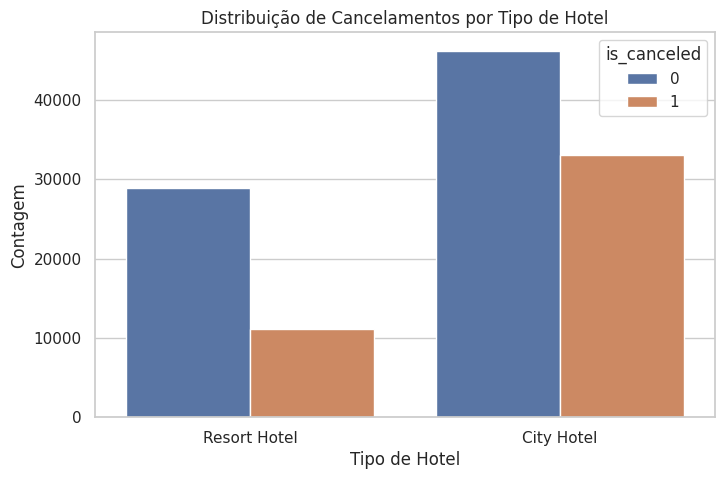

In [8]:
# Distribuição de uma variável categórica, tipo de hotel
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Distribuição de Cancelamentos por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Contagem')
plt.show()



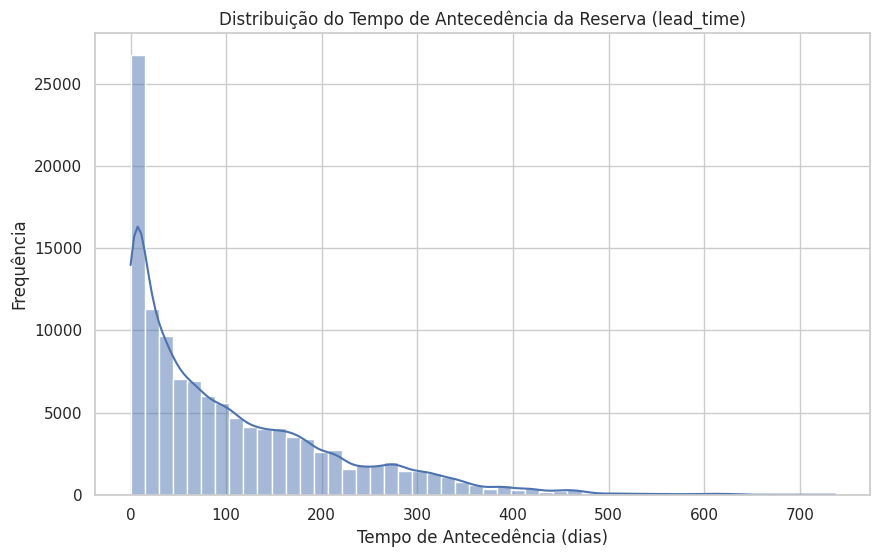

In [9]:
# Distribuição de uma variável numérica, 'lead_time'
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribuição do Tempo de Antecedência da Reserva (lead_time)')
plt.xlabel('Tempo de Antecedência (dias)')
plt.ylabel('Frequência')
plt.show()

/tmp/ipython-input-10-3103910615.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


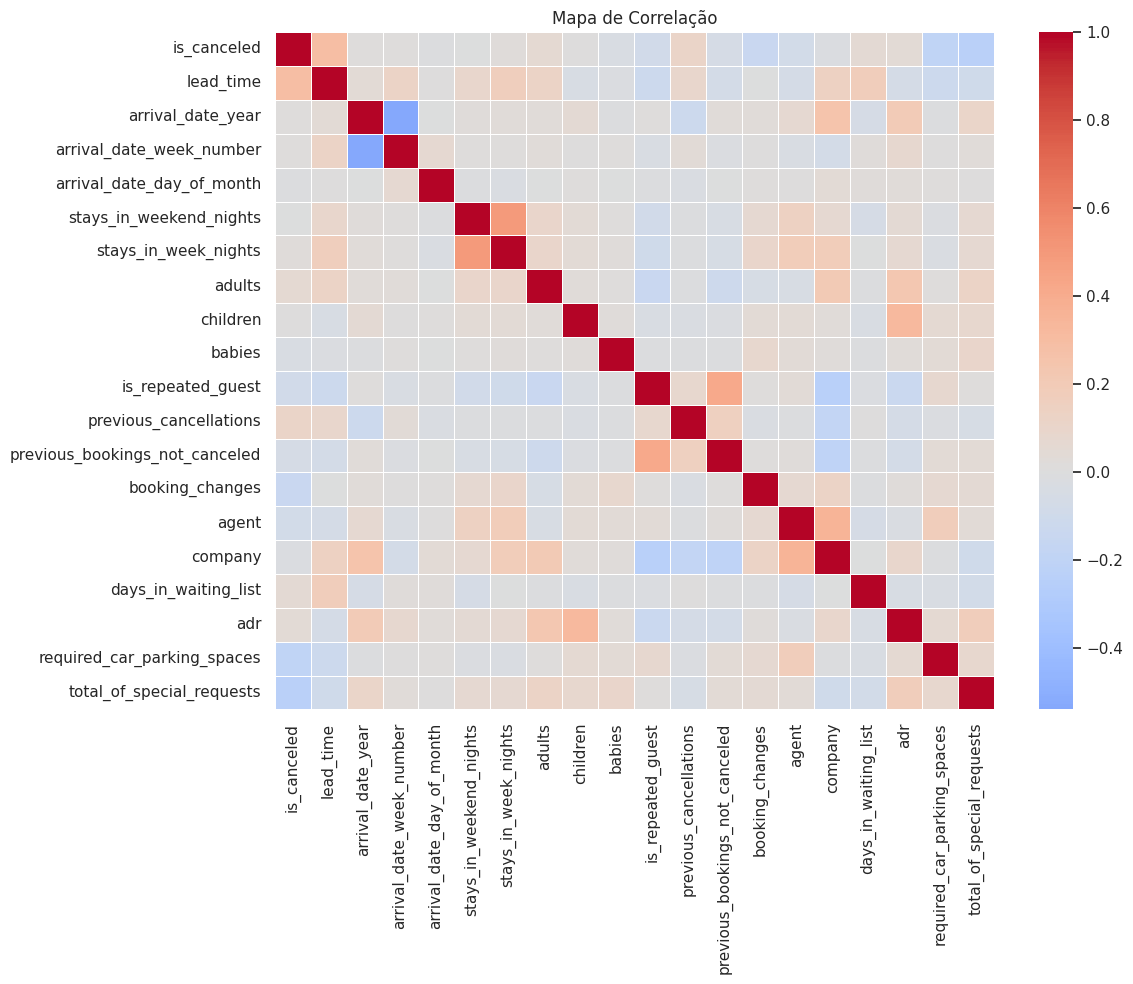

In [10]:
# Correlação entre variáveis numéricas (após tratamento de nulos)
# Preencher nulos em 'children' com 0
df['children'].fillna(0, inplace=True)

# Selecionar apenas colunas numéricas para a matriz de correlação
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
# Matriz de correlação
corr = df[numeric_cols].corr()
# Heatmap (mapa de calor) da correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.4)
plt.title("Mapa de Correlação")
plt.tight_layout()
plt.show()

A análise descritiva inicial revela a estrutura do dataset, permitindo identificar o número de entradas, a presença de valores nulos e a distribuição geral das variáveis. A visualização da variável is_canceled é crucial para entender o desbalanceamento das classes, o que pode influenciar a escolha de métricas de avaliação e técnicas de modelagem. A correlação entre as variáveis numéricas também fornece insights sobre as relações dentro dos dados, que podem ser importantes para a seleção de features.

# **b) Modelo de Regressão Logística (60%)**

• Construa um modelo de Regressão Logística para prever o cancelamento das
reservas.

• Apresente as métricas de desempenho do modelo, como acurácia, precisão,
recall e F1-score.

In [11]:
# Copiar o dataframe para evitar modificar o original
df_model = df.copy()

# Remover colunas com muitos valores ausentes or que não são relevantes para o modelo
# Ensure 'arrival_date_month' is dropped here
df_model.drop(columns=['company', 'agent', 'reservation_status_date', 'arrival_date_month'], inplace=True)

# Tratamento de valores ausentes (se não foi feito antes)
df_model['children'].fillna(0, inplace=True)
df_model['country'].fillna('Unknown', inplace=True)

# Identificar colunas categóricas e numéricas *after* dropping irrelevant columns
cat_vars = df_model.select_dtypes(include=['object']).columns
cat_num = df_model.select_dtypes(include=['int64', 'float64']).columns.drop('is_canceled')

df_model = pd.get_dummies(df_model, columns=cat_vars, drop_first=False)

/tmp/ipython-input-11-3135284019.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['children'].fillna(0, inplace=True)
/tmp/ipython-input-11-3135284019.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [12]:
df_model.shape

(119390, 248)

In [13]:
def find_columns_with_word(dataframe, word):
    """
    Busca em quais colunas de um DataFrame a palavra especificada está presente.

    Args:
        dataframe (pd.DataFrame): O DataFrame a ser pesquisado.
        word (str): A palavra a ser buscada.

    Returns:
        list: Uma lista com os nomes das colunas que contêm a palavra.
    """
    columns_found = []
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':  # Foca em colunas de string/object
            # Verifica se a palavra está presente em qualquer valor da coluna (case-insensitive)
            if dataframe[col].astype(str).str.contains(word, case=False, na=False).any():
                columns_found.append(col)
    return columns_found

# Exemplo de uso:
word_to_find = 'August'
columns_containing_august = find_columns_with_word(df, word_to_find)

if columns_containing_august:
    print(f"A palavra '{word_to_find}' foi encontrada nas seguintes colunas: {columns_containing_august}")
else:
    print(f"A palavra '{word_to_find}' não foi encontrada em nenhuma coluna do tipo string.")

A palavra 'August' foi encontrada nas seguintes colunas: ['arrival_date_month']


In [14]:
from imblearn.over_sampling import SMOTE # Importar SMOTE

# Separar features (X) e variável alvo (y)
X = df_model.drop('is_canceled', axis=1)
y = df_model['is_canceled']


os = SMOTE(random_state=0)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_df_X,os_df_y=os.fit_resample(X_train, y_train)
os_df_X = pd.DataFrame(os_df_X,columns=columns )
os_df_y= pd.DataFrame(os_df_y,columns=['is_canceled'])
# we can Check the numbers of our data
print("Tamanho do oversampled é: ",len(os_df_X))
print("Contagem de classes no oversampled data:")
print(os_df_y['is_canceled'].value_counts())
print("Proporção de clientes que não cancelaram a reserva: {:.2f}%".format(os_df_y['is_canceled'].value_counts(normalize=True)[0] * 100))
print("Proporção de clientes que cancelaram a reserva: {:.2f}%".format(os_df_y['is_canceled'].value_counts(normalize=True)[1] * 100))

Tamanho do oversampled é:  105590
Contagem de classes no oversampled data:
is_canceled
0    52795
1    52795
Name: count, dtype: int64
Proporção de clientes que não cancelaram a reserva: 50.00%
Proporção de clientes que cancelaram a reserva: 50.00%


In [16]:
# RFE - Para seleção de variáveis

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear', max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=20)
rfe.fit(X_train, y_train.values.ravel()) # Use X_train and y_train from the split
variaveis_selecionadas = X.columns[rfe.support_].tolist()

print("Variáveis selecionadas:", variaveis_selecionadas)

Variáveis selecionadas: ['adults', 'required_car_parking_spaces', 'total_of_special_requests', 'hotel_City Hotel', 'country_AGO', 'country_DEU', 'country_FRA', 'country_PRT', 'market_segment_Groups', 'market_segment_Online TA', 'distribution_channel_TA/TO', 'reserved_room_type_D', 'reserved_room_type_E', 'assigned_room_type_A', 'deposit_type_No Deposit', 'deposit_type_Non Refund', 'customer_type_Transient', 'reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show']


In [17]:
import statsmodels.api as sm


# 1. Selecionar variáveis escolhidas pelo RFE
x = os_df_X[variaveis_selecionadas].copy()
y = os_df_y['is_canceled'].copy()

# 2. Converter booleanos para inteiros (essencial para o statsmodels)
x = x.astype(int)

# 3. Garantir que y é numérico
y = pd.to_numeric(y, errors='coerce')

# 4. Remover linhas com possíveis valores ausentes (por segurança)
mask = x.notnull().all(axis=1) & y.notnull()
x = x.loc[mask]
y = y.loc[mask]

# 5. Adicionar constante
x_const = sm.add_constant(x)

# 6. Ajustar modelo Logit
logit_model = sm.Logit(y, x_const)
result = logit_model.fit(disp=True)

# 7. Exibir resumo
print(result.summary2())

         Current function value: 0.000000
         Iterations: 35
                                    Results: Logit
Model:                     Logit                   Method:                  MLE       
Dependent Variable:        is_canceled             Pseudo R-squared:        1.000     
Date:                      2025-07-22 02:16        AIC:                     42.0156   
No. Observations:          105590                  BIC:                     242.9293  
Df Model:                  20                      Log-Likelihood:          -0.0078096
Df Residuals:              105569                  LL-Null:                 -73189.   
Converged:                 0.0000                  LLR p-value:             0.0000    
No. Iterations:            35.0000                 Scale:                   1.0000    
--------------------------------------------------------------------------------------
                              Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
log_odds = result.params
pd.DataFrame({'coef': log_odds})\
            .sort_values(by='coef', ascending=False)

,coef
const,31.504871
country_DEU,10.384838
reservation_status_No-Show,7.842680
market_segment_Online TA,4.351320
assigned_room_type_A,3.214564
reserved_room_type_D,2.999963
adults,1.853449
reservation_status_Canceled,1.113332
market_segment_Groups,1.002713
deposit_type_No Deposit,0.579635


In [19]:
# Calcula os odds ratios com base nos coeficientes do modelo
odds = np.exp(result.params)

# Cria DataFrame com os odds e ordena
odds_df = pd.DataFrame(odds, columns=['coef']).sort_values(by='coef', ascending=False)

# Exibe a tabela formatada
print(odds_df)

                                      coef
const                         4.812732e+13
country_DEU                   3.236516e+04
reservation_status_No-Show    2.547021e+03
market_segment_Online TA      7.758082e+01
assigned_room_type_A          2.489244e+01
reserved_room_type_D          2.008480e+01
adults                        6.381791e+00
reservation_status_Canceled   3.044485e+00
market_segment_Groups         2.725665e+00
deposit_type_No Deposit       1.785387e+00
total_of_special_requests     1.191898e+00
reserved_room_type_E          1.132873e+00
hotel_City Hotel              8.069934e-01
country_AGO                   5.625697e-01
required_car_parking_spaces   3.726151e-01
deposit_type_Non Refund       2.531298e-01
country_PRT                   1.613696e-02
customer_type_Transient       1.519513e-03
distribution_channel_TA/TO    2.976475e-04
country_FRA                   2.222865e-04
reservation_status_Check-Out  4.475222e-26


In [21]:
# Previsão no conjunto de teste
y_pred_prob = result.predict(sm.add_constant(X_test[variaveis_selecionadas].astype(int)))

# Converte probabilidade em classe (limiar padrão = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [22]:
# Calcular métricas

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Revocação (Recall): {:.2f}".format(recall_score(y_test, y_pred)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred)))

Acurácia: 1.00
Precisão: 1.00
Revocação (Recall): 1.00
F1-Score: 1.00


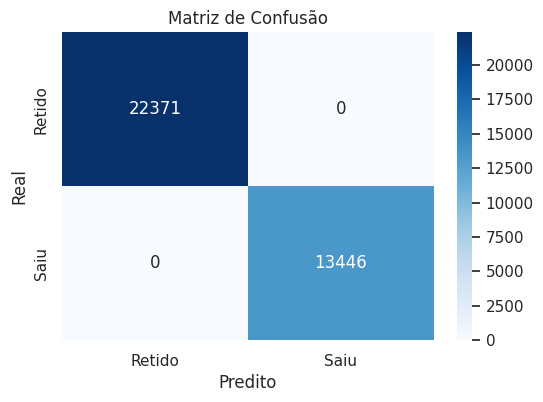

In [23]:
# Matriz de confusão

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Retido', 'Saiu'], yticklabels=['Retido', 'Saiu'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

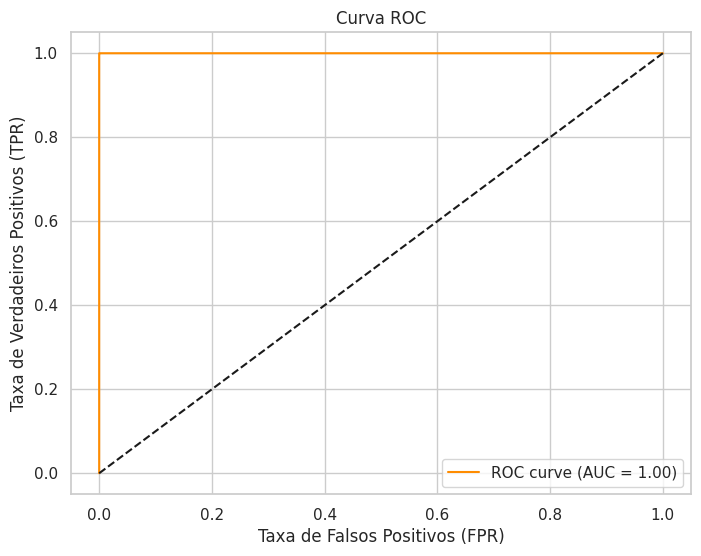

In [24]:
# Curva ROC e AUC

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [26]:
# Gráfico de importância

coefficients = pd.DataFrame(odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=True)

plt.figure(figsize=(12,8))
plt.barh(coefficients.index, coefficients['coef'], color=['C{}'.format(i) for i in range(len(coefficients))])
plt.xlabel('Probabilidade (%)')
plt.ylabel('Variáveis')
plt.title('Gráfico de Importância')
plt.show()

# Visualização das features mais importantes (top N)
plt.figure(figsize=(12, 8))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Features Mais Importantes (Valor Absoluto do Coeficiente) com SMOTE')
plt.xlabel('Valor Absoluto do Coeficiente')
plt.ylabel('Feature')
plt.show()

NameError: name 'feature_importance' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Construir e treinar o modelo de Regressão Logística
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model.fit(os_df_X, os_df_y)

# Fazer previsões no conjunto de teste (não resampleado)
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

In [ ]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n--- Métricas de Desempenho do Modelo de Regressão Logística (com SMOTE) ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"\nMatriz de Confusão:\n{conf_matrix}")

In [ ]:
# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Cancelado', 'Cancelado'],
            yticklabels=['Não Cancelado', 'Cancelado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (com SMOTE)')
plt.show()

In [ ]:
# Acessar os coeficientes do modelo de Regressão Logística (após SMOTE e pré-processamento)
# Para interpretar corretamente os coeficientes, é preciso ter os nomes das features
# que foram geradas pelo OneHotEncoder
feature_names_out = preprocessor.get_feature_names_out()
coefficients = model.coef_[0]

# Criar um DataFrame para exibir os coeficientes
feature_importance = pd.DataFrame({'Feature': feature_names_out, 'Coefficient': coefficients})
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print("\n--- Importância das Features (Coeficientes do Modelo de Regressão Logística com SMOTE) ---")
print(feature_importance.head(15)) # Exibir as 15 features mais importantes

# Visualização das features mais importantes (top N)
plt.figure(figsize=(12, 8))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Features Mais Importantes (Valor Absoluto do Coeficiente) com SMOTE')
plt.xlabel('Valor Absoluto do Coeficiente')
plt.ylabel('Feature')
plt.show()

# **c) Análise das Features (20%)**

• Identifique as features mais importantes para o cancelamento das reservas.
• Interprete os resultados, destacando quais variáveis têm maior impacto na
previsão.

# **d) Justificativa do Método (10%)**

• Explique por que a Regressão Logística é mais apropriada para este problema
em comparação à Regressão Linear.